<a href="https://colab.research.google.com/github/Almoatasembellahhggag/ML_Final/blob/master/mini_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import numpy as np

import pandas as pd

from numpy import genfromtxt

# Plotting library


from matplotlib import pyplot

pyplot.rcParams.update({'figure.max_open_warning': 0})

from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook

%matplotlib inline




In [ ]:
#Reading The Data from the CSV

housedata = pd.read_csv("house_data_complete.csv") 


trainingdata = pd.read_csv("house_prices_data_training_data.csv") 

#Cleaning the Data from NA

housedata_clean = housedata.apply(lambda x: pd.Series(x.dropna().values))

trainingdata_clean = trainingdata.apply(lambda x: pd.Series(x.dropna().values))









In [ ]:
def plotData(x, y,a,b):

    fig = pyplot.figure() 
    pyplot.plot(x, y, 'bo', ms=10, mec='k')
    pyplot.ylabel(b)
    pyplot.xlabel(a)


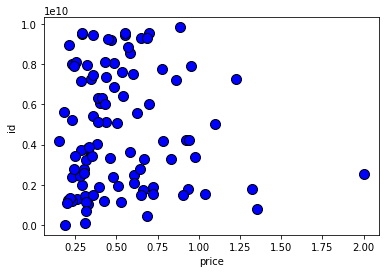

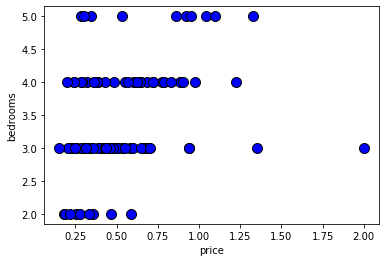

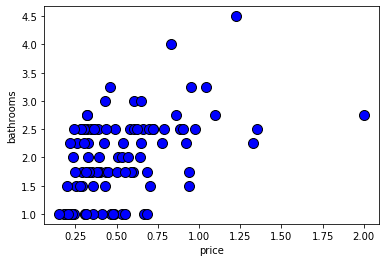

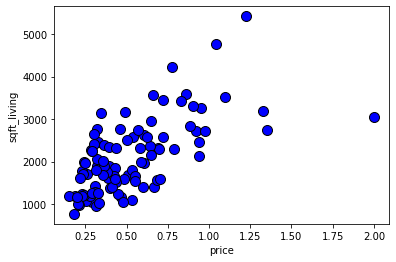

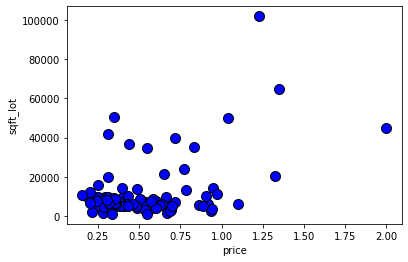

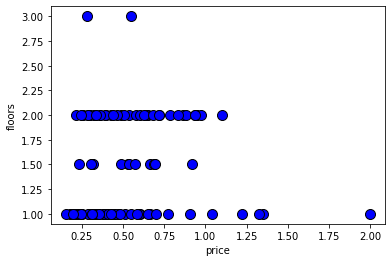

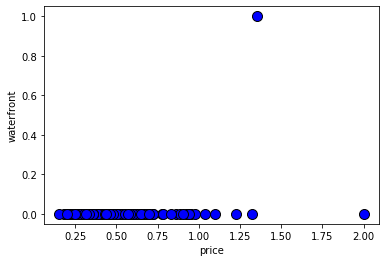

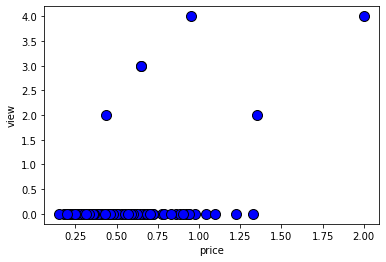

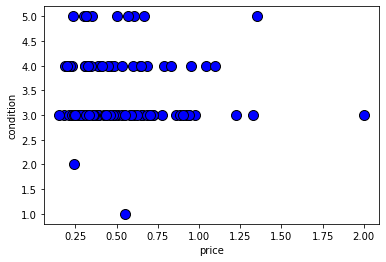

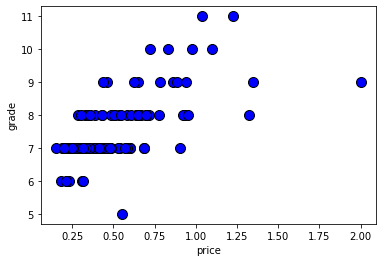

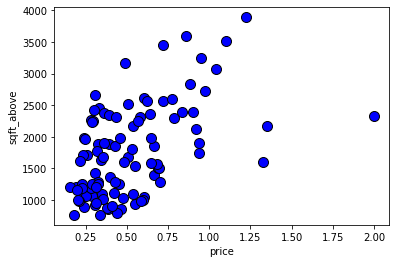

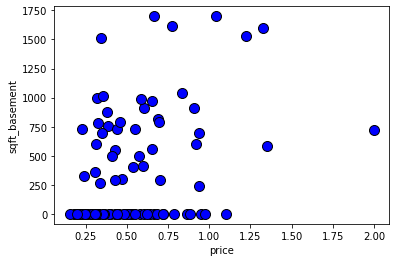

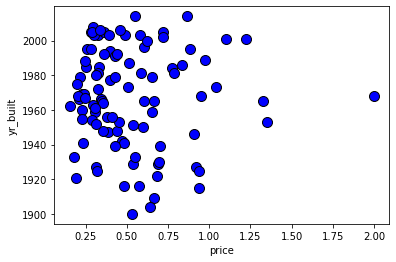

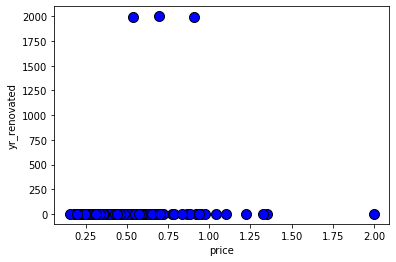

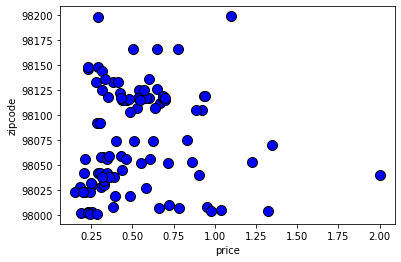

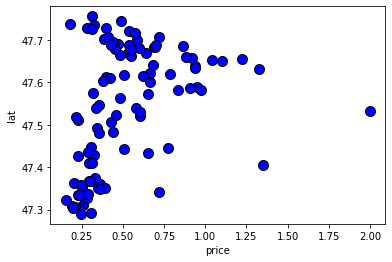

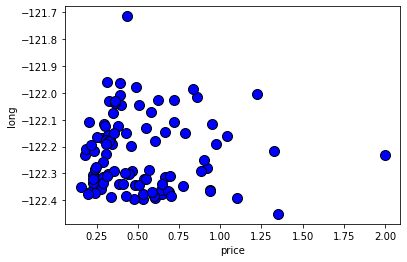

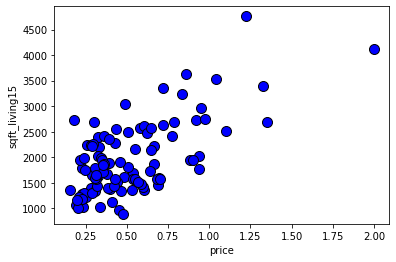

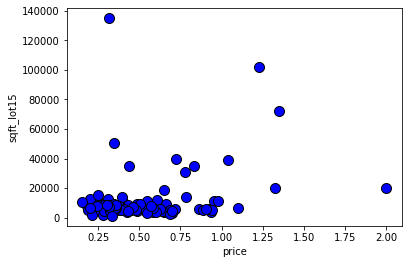

In [ ]:
price = housedata_clean['price'] /1000000




for key in housedata_clean:
    if (key!= 'date' and key!='price'):
        plotData(price[1:100],housedata_clean[key][1:100],'price',key)

      
   

                     

         
    
    


           



            
            
        






In [ ]:
def featureNormalizee(df):

    for key in df :
        if ((key != 'date')):
            df[key] = df[key].astype(float)
            df[key] = (df[key]-df[key].min())/(df[key].max()-df[key].min())

    return df
    
   
        
        
    


In [ ]:

x = featureNormalizee(housedata_clean)

validate, test,train = np.split(x.sample(frac=1), [int(.2*len(x)), int(.4*len(x))])




In [ ]:
def computeCostMulti(X, y,lampda ,theta):

    m = y.shape[0] 
    temp = np.dot(X, theta) - y
    temp2 =(np.power(theta,2) * (lampda)) / (2*m)
    return np.sum(np.power(temp, 2)) / (2*m) + temp2
    


In [ ]:
def gradientDescentMulti(X, y, theta, alpha,lampda, num_iters):

    m = y.shape[0] 
    
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        temp = np.dot( theta,theta) - y
        temp = np.dot( X.T.astype(int),temp)
        theta = theta - (alpha/m) * temp
        J_history.append(computeCostMulti(X, y,lampda, theta))
        
    
    return theta, J_history

theta computed from gradient descent: [0.00000000e+00 0.00000000e+00 8.50746151e-05 3.43809863e-04
 3.43809863e-04 9.45405388e-05 6.84069256e-04 2.64209012e-02
 4.34894067e-02 8.23020958e-02 4.96463658e-03 3.43809863e-04
 7.20553625e-04 2.02529290e-03 7.95962492e-04 2.07960288e-02
 4.56253781e-05 1.82211550e-05 0.00000000e+00 0.00000000e+00]
theta2 computed from gradient descent: [0.00000000e+00 0.00000000e+00 8.50746151e-05 3.43809863e-04
 3.43809863e-04 9.45405388e-05 6.84069256e-04 2.64209012e-02
 4.34894067e-02 8.23020958e-02 4.96463658e-03 3.43809863e-04
 7.20553625e-04 2.02529290e-03 7.95962492e-04 2.07960288e-02
 4.56253781e-05 1.82211550e-05 0.00000000e+00 0.00000000e+00]
theta3 computed from gradient descent: [0.00000000e+00 0.00000000e+00 8.50746151e-05 3.43809863e-04
 3.43809863e-04 9.45405388e-05 6.84069256e-04 2.64209012e-02
 4.34894067e-02 8.23020958e-02 4.96463658e-03 3.43809863e-04
 7.20553625e-04 2.02529290e-03 7.95962492e-04 2.07960288e-02
 4.56253781e-05 1.82211550e-

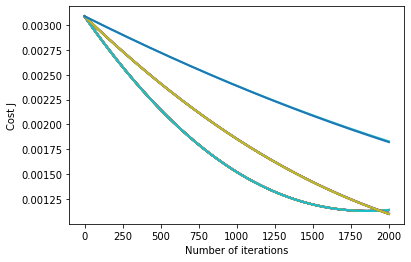

In [ ]:

alpha = 0.0078
alpha2 = 1.09
alpha3 = 3.2

num_iters = 2000
lampda = 10

# 1st hypo all features 
theta = np.zeros(20)
train.pop('date')
theta, J_history = gradientDescentMulti(train, train['price'], theta, alpha,lampda, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
print('theta computed from gradient descent: {:s}'.format(str(theta)))




# 2nd hypo sqft living , sqft lot , sqft above , sqft basement , long , sqft living15 ,sqft lot 15 ,bathrooms ,lat
theta2 = np.zeros(9)
train2 = train[['bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','long','lat','sqft_living15','sqft_lot15','price']]
train2_noprice = train[['bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','long','lat','sqft_living15','sqft_lot15']]
theta2, J_history2 = gradientDescentMulti(train2_noprice, train2['price'], theta2, alpha2,lampda, num_iters)
pyplot.plot(np.arange(len(J_history2)), J_history2, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
print('theta2 computed from gradient descent: {:s}'.format(str(theta)))


# 3rd hypo sqft living , sqft living15 
theta3 = np.zeros(2)
train3 = train[['sqft_living','sqft_living15','price']]
train3_noprice = train[['sqft_living','sqft_living15']]
theta3, J_history3 = gradientDescentMulti(train3_noprice, train3['price'], theta3, alpha3,lampda, num_iters)
pyplot.plot(np.arange(len(J_history3)), J_history3, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
print('theta3 computed from gradient descent: {:s}'.format(str(theta)))



